# Introducción

El **objetivo del presente trabajo es desarrollar un prototipo de modelo de Machine Learning** para Zyfra, empresa especializada en soluciones de eficiencia para la industria pesada. El modelo permitirá **predecir la cantidad de oro extraído del mineral**, utilizando datos de extracción y purificación, con el fin de optimizar la producción y eliminar parámetros no rentables.



# Preparación de datos

## Apertura y examinación de datos

In [1]:
# Importación de paquetes, librerías y módulos

# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Librerías de machine learning - modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

# Librerías de machine learning - evaluación y validación
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics as met

In [2]:
# Carga de datos

try:
    data = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv')
    data_train = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv')
    data_test = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv')
except:
    data = pd.read_csv('/datasets/gold_recovery_full.csv')
    data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
    data_test = pd.read_csv('/datasets/gold_recovery_test.csv')

In [3]:
# Exploración del df completo

data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
# Exploración del df de entrenamiento

data_train.info()
display(data_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
# Exploración del df de prueba

data_test.info()
display(data_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Se encontraron columnas faltantes en este df. Se añadirán posteriormente en el procesamiento de datos

In [6]:
# Búsqueda de filas duplicadas en los dfs

print('Filas duplicadas: ', 
      data.duplicated().sum(),
      data_train.duplicated().sum(), 
      data_test.duplicated().sum()
     )

Filas duplicadas:  0 0 0


Según la descripción del proyecto, el conjunto de datos original (22,716 registros) incluye los valores combinados de los conjuntos de entrenamiento y prueba, con 16,860 y 5,856 registros respectivamente. 

Al analizar el tamaño de cada conjunto (filas y columnas), observamos que todas las columnas son de tipo numérico flotante, excepto la columna `date`, que actualmente es de tipo objeto y debe convertirse a tipo datetime para facilitar su manejo.

Todas las columnas numéricas tienen tipo de dato `float64`. Se identificaron valores faltantes en varias columnas; sin embargo, el tratamiento de estos datos faltantes y la eliminación de duplicados se abordarán en etapas posteriores del proyecto.

## Revisión del cálculo de recuperación

$$
Recuperación = \frac { C * (F-T)} { F * (C - T)} * 100\%
$$

- C = la proporción de oro en el concentrado justo después de la flotación (`rougher.output.concentrate_au`) o después de la purificación (`final.output.concentrate_au`)
- F = la proporción de oro en la alimentación antes de la flotación (`rougher.input.feed_au`) o en el concentrado justo después de la flotación (`primary_cleaner.output.concentrate_au`)
- T = la proporción de oro en las colas rougher justo después de la flotación (`rougher.output.tail_au`) o después de la purificación (`secundary_cleanear.output.tail_au`)

In [7]:
# Función para el cálculo de la recuperación de concentrados

def recovery(data, concentrate):
    if concentrate == 'rougher':
        c = data['rougher.output.concentrate_au']
        f = data['rougher.input.feed_au']
        t = data['rougher.output.tail_au']
    elif concentrate == 'final':
        c = data['final.output.concentrate_au']
        f = data['primary_cleaner.output.concentrate_au']
        t = data['secundary_cleanear.output.tail_au']

    recovery = ((c * (f - t)) / (f * (c - t))) * 100
    return recovery

Hemos desarrollado una función para calcular la recuperación del *concentrado rougher* y del *concentrado final*. Utilizaremos esta función para verificar la precisión del cálculo de recuperación rougher en la característica `rougher.output.recovery` del conjunto de entrenamiento. Posteriormente, evaluaremos el desempeño mediante el cálculo del error absoluto medio (EAM) entre nuestros resultados y los valores reales de la característica.

In [8]:
# Cálculo de la recuperación del concentrado rougher

# Guardado de los datos de entrenamiento sin NaN de la columna "rougher.output.recovery"
data_train_dep = data_train.dropna(subset=['rougher.output.recovery'])
concentrate = ['rougher', 'final']

rougher_recovery_calculate = recovery(data_train_dep, concentrate[0])
rougher_recovery_calculate

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 14287, dtype: float64

In [9]:
# Cálculo del Error Absoluto Medio (EAM)

eam = mean_absolute_error(data_train_dep['rougher.output.recovery'],
                          rougher_recovery_calculate)

print('EAM de la recuperación del concentrado rougher', eam)


EAM de la recuperación del concentrado rougher 9.303415616264301e-15


La recuperación del *concentrado rougher* en el conjunto de entrenamiento es precisa, con un EAM cercano a cero (9.3×10⁻¹⁵). Esto indica que los valores calculados coinciden prácticamente con los datos originales, confirmando la validez del modelo para esta variable.

## Procesamiento de datos

## Análisis de características no disponibles en el conjunto de prueba

Ahora exploraremos las características no disponibles en el conjunto de prueba:

In [10]:
# Búsqueda de columnas faltantes
missing_columns = list(set(data.columns) - set(data_test.columns))
missing_columns

['rougher.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'final.output.recovery',
 'primary_cleaner.output.tail_ag',
 'rougher.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_ag',
 'secondary_cleaner.output.tail_au',
 'final.output.concentrate_sol',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.concentrate_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.concentrate_sol',
 'final.output.tail_ag',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_ag',
 'rougher.calculation.sulfate_to_au_concentrate',
 'primary_cleaner.output.tail_au',
 'final.output.tail_au',
 'rougher.output.tail_au',
 'rougher.calculation.au_pb_ratio',
 'primary_cleaner.output.concentrate_pb',
 'secondary_cleaner.output.tail_sol',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'final.out

Se identificó que el conjunto de datos de prueba presenta 34 columnas faltantes, incluyendo las variables objetivo `rougher.output.recovery` y `final.output.recovery`. Además, faltan 4 parámetros correspondientes a la etapa de `calculation` y todos los 30 parámetros de la etapa `output`. Aquí se detallan las columnas faltantes por cada etapa del proceso:

*Etapa `rougher`, parámetros `calculation` y `output`*
- `'rougher.calculation.sulfate_to_au_concentrate'`
- `'rougher.calculation.floatbank10_sulfate_to_au_feed'`
- `'rougher.calculation.floatbank11_sulfate_to_au_feed'`
- `'rougher.calculation.au_pb_ratio'`
- `'rougher.output.concentrate_ag'`
- `'rougher.output.concentrate_pb'`
- `'rougher.output.concentrate_sol'`
- `'rougher.output.concentrate_au'`
- **`'rougher.output.recovery'`**
- `'rougher.output.tail_ag'`
- `'rougher.output.tail_pb'`
- `'rougher.output.tail_sol'`
- `'rougher.output.tail_au'`

*Etapa `primary_cleaner`, parámetro `output`*
- `'primary_cleaner.output.concentrate_ag'`
- `'primary_cleaner.output.concentrate_pb'`
- `'primary_cleaner.output.concentrate_sol'`
- `'primary_cleaner.output.concentrate_au'`
- `'primary_cleaner.output.tail_ag'`
- `'primary_cleaner.output.tail_pb'`
- `'primary_cleaner.output.tail_sol'`
- `'primary_cleaner.output.tail_au'`

*Etapa `secondary_cleaner`, parámetro `output`*
- `'secondary_cleaner.output.tail_ag'`
- `'secondary_cleaner.output.tail_pb'`
- `'secondary_cleaner.output.tail_sol'`
- `'secondary_cleaner.output.tail_au']`
  
*Etapa `final`, parámetro `output`*
- `'final.output.concentrate_ag'`
- `'final.output.concentrate_pb'`
- `'final.output.concentrate_sol'`
- `'final.output.concentrate_au'`
- **`'final.output.recovery'`**
- `'final.output.tail_ag'`
- `'final.output.tail_pb'`
- `'final.output.tail_sol'`
- `'final.output.tail_au'`
  
Estas características corresponden a valores obtenidos en distintas etapas del proceso de refinación posterior a la flotación. Específicamente, representan concentrados y mediciones de diversos materiales y subproductos antes y después de las fases de purificación.

Se incorporarán las variables objetivo al conjunto de prueba para garantizar la integridad estructural durante la validación.

In [11]:
# Se utiliza 'date' como índice para asegurar alineación
data_indexed = data.set_index('date')
data_test_indexed = data_test.set_index('date')

# Se añaden las columnas faltantes de data a data_test sobre el índice ('date')
data_test_updated = data_test_indexed.join(data_indexed[missing_columns], how='left')

# Columnas presentes en data_test_updated (original + añadidas)
cols = data_test_updated.columns

# Ordenar columnas de acuerdo a data
ordered_cols = [col for col in data_indexed.columns if col in cols]
data_test_updated = data_test_updated[ordered_cols]
data_test_updated = data_test_updated.reset_index()

# Regresa a su nombre original
data_test = data_test_updated

data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                5856 non-null   object 
 1   final.output.concentrate_ag                         5839 non-null   float64
 2   final.output.concentrate_pb                         5841 non-null   float64
 3   final.output.concentrate_sol                        5841 non-null   float64
 4   final.output.concentrate_au                         5841 non-null   float64
 5   final.output.recovery                               5414 non-null   float64
 6   final.output.tail_ag                                5839 non-null   float64
 7   final.output.tail_pb                                5839 non-null   float64
 8   final.output.tail_sol                               5730 non-null   float64
 9

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


### Columna de fechas

Para facilitar su uso en operaciones posteriores, convertiremos la columna de fechas al tipo de dato `datetime`. 

In [12]:
# Cambio a formato datetime
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')

data[['date']].info()
display(data[['date']].head(3))

data_train[['date']].info()
display(data_train[['date']].head(3))

data_test[['date']].info()
display(data_test[['date']].head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    22716 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 177.6 KB


,date
0,2016-01-15 00:00:00
1,2016-01-15 01:00:00
2,2016-01-15 02:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    16860 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 131.8 KB


,date
0,2016-01-15 00:00:00
1,2016-01-15 01:00:00
2,2016-01-15 02:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5856 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 45.9 KB


,date
0,2016-09-01 00:59:59
1,2016-09-01 01:59:59
2,2016-09-01 02:59:59


### Valores faltantes

Primero, evaluaremos la cantidad de valores faltantes en los conjuntos de datos antes de definir la estrategia para su tratamiento. Cabe destacar que el conjunto de datos original es la combinación de los conjuntos de entrenamiento y prueba, por lo que podría existir solapamiento en los valores faltantes entre estos subconjuntos.

In [13]:
# Número de filas con valores faltantes en los df
print('Número de filas con valores faltantes en el conjunto original: ', data[data.isna().sum(axis=1) > 0].shape)
print('Número de filas con valores faltantes en el conjunto de entrenamiento: ', data_train[data_train.isna().sum(axis=1) > 0].shape)
print('Número de filas con valores faltantes en el conjunto de prueba: ', data_test[data_test.isna().sum(axis=1) > 0].shape)

Número de filas con valores faltantes en el conjunto original:  (6622, 87)
Número de filas con valores faltantes en el conjunto de entrenamiento:  (5843, 87)
Número de filas con valores faltantes en el conjunto de prueba:  (779, 87)


In [14]:
# Listado de columnas con valores faltantes
print(data.columns[data.isna().any()])

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary

Se identificaron 6.622 registros con al menos un valor faltante en el conjunto de datos (29.2% del total de 22.716 entradas). Considerando la naturaleza temporal de los datos y la correlación entre mediciones cercanas, se implementará la siguiente estrategia:

- Eliminar filas con valores faltantes en las variables objetivo (`rougher.output.recovery` y `final.output.recovery`).

- Agrupar los datos por fecha (`dt.date`) y aplicar el método de `forward fill` para imputar valores faltantes restantes.

- Eliminar registros remanentes con valores faltantes tras la imputación.

Para garantizar consistencia y eficiencia, este proceso se automatizará mediante la función `fill_and_drop()`, aplicable a cualquier dataframe del proyecto.



In [15]:
# Función para rellenado de fechas
def fill_and_drop(df):
    df = df.groupby(df['date'].dt.date).ffill()
    
    return df.dropna()  

In [16]:
# Identificación de filas con objetivos ausentes
nan_target_rows = data[data['rougher.output.recovery'].isna() | data['final.output.recovery'].isna()]

# Eliminar esas filas de los conjuntos principal, de entrenamiento y prueba según fechas coincidentes
data.drop(nan_target_rows.index, inplace=True)
data_train.drop((data.query('date in @nan_target_rows.date')).index, inplace=True)
data_test.drop((data.query('date in @nan_target_rows.date')).index, inplace=True)

# Limpiar los conjuntos aplicando ffill y eliminando valores faltantes restantes
data = fill_and_drop(data)
data_train = fill_and_drop(data_train)
data_test = fill_and_drop(data_test)

print('Número de filas con valores faltantes en el conjunto original: ', data[data.isna().sum(axis=1) > 0].shape)
print('Número de filas con valores faltantes en el conjunto de entrenamiento: ', data_train[data_train.isna().sum(axis=1) > 0].shape)
print('Número de filas con valores faltantes en el conjunto de prueba: ', data_test[data_test.isna().sum(axis=1) > 0].shape)

Número de filas con valores faltantes en el conjunto original:  (0, 87)
Número de filas con valores faltantes en el conjunto de entrenamiento:  (0, 87)
Número de filas con valores faltantes en el conjunto de prueba:  (0, 87)


### Verificación de valores duplicados

Se analizará el conjunto de datos original para identificar posibles valores duplicados y, en caso de encontrarlos, se eliminarán las entradas correspondientes para garantizar la calidad y consistencia de los datos.

In [17]:
print('Número de duplicados: ', data.duplicated().sum())

Número de duplicados:  0


No se detectaron valores duplicados en el conjunto de datos original, por lo que se garantiza que tampoco existen en los subconjuntos de entrenamiento y prueba.

# Análisis de datos

## Cambio en la concentración de metales durante la etapa de purificación

A continuación se observará el cambio en la concentración de oro, plata y plomo (Au, Ag, Pb) en función de la etapa de purificación.

In [18]:
# Extracción de datos de cada metal

au = data[['date', 'primary_cleaner.output.concentrate_au', 'secondary_cleaner.output.tail_au']].set_index(keys='date')  # Oro
ag = data[['date', 'primary_cleaner.output.concentrate_ag', 'secondary_cleaner.output.tail_ag']].set_index(keys='date')  # Plata
pb = data[['date', 'primary_cleaner.output.concentrate_pb', 'secondary_cleaner.output.tail_pb']].set_index(keys='date')  # Plomo

In [19]:
# Función para descripción y visualización de concentraciones

def concentration(metal):
    
    summary = metal.describe().loc[['count', 'mean', 'std', 'min', '50%', 'max']]
    display(summary.round(2).style.format("{:,.2f}"))

    # Visualización del cambio de concentración de oro

    plt.figure(figsize=(15, 4))
    plt.plot(metal.index, 
             metal.iloc[:, 0], 
             label='Primera etapa')
    
    plt.plot(metal.index, 
             metal.iloc[:, 1], # Segunda columna
             label='Segunda etapa')
                
    plt.title('Cambio de concentración de oro según la etapa de purificación')
    plt.legend()
    plt.xlabel('Fecha')
    plt.ylabel('Concentración \n')
    plt.show()

### Comparación de las concentraciones de oro

,primary_cleaner.output.concentrate_au,secondary_cleaner.output.tail_au
count,"17,501.00","17,501.00"
mean,32.08,4.39
std,5.46,2.26
min,0.00,0.00
50%,32.71,4.09
max,45.93,26.81


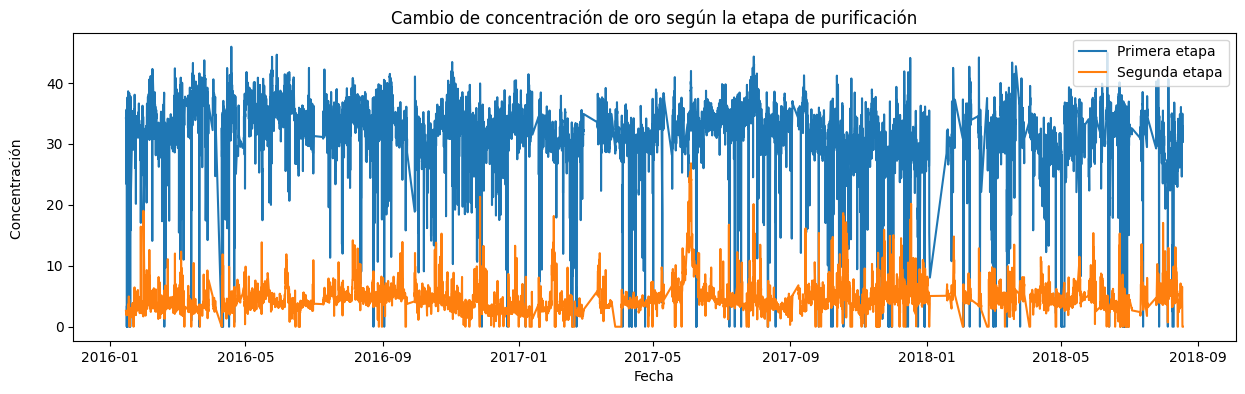

In [20]:
# Comparación de las concentraciones de oro

concentration(au)

La concentración de oro es mayor en la primera etapa de limpieza que en la segunda etapa de limpieza. La mediana está cerca de la media en ambas etapas, lo que indica una distribución relativamente simétrica sin sesgos extremos. La concentración media de oro en la primera etapa es aproximadamente 7 veces mayor que en la segunda etapa (32.08 vs 4.39 g/t), lo que indica que la mayor parte del oro valioso se concentra en la salida del limpiador primario.

### Comparación de las concentraciones de plata

,primary_cleaner.output.concentrate_ag,secondary_cleaner.output.tail_ag
count,"17,501.00","17,501.00"
mean,8.56,14.67
std,2.02,3.93
min,0.00,0.00
50%,8.60,15.45
max,16.08,23.26


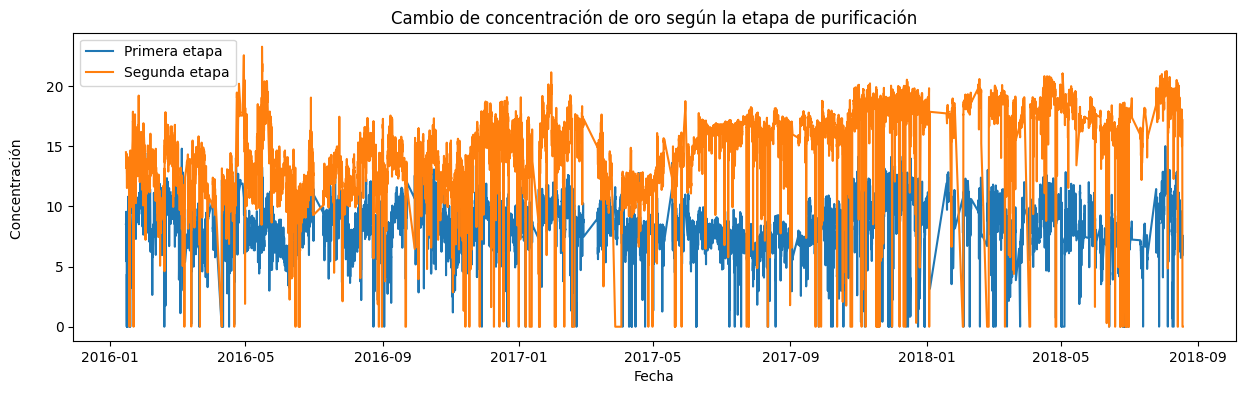

In [21]:
# Comparación de las concentraciones de plata

concentration(ag)

La concentración media de plata aumenta notablemente de la primera etapa (8.56) a la segunda etapa (14.67), lo que indica que el proceso de purificación está incrementando la concentración de plata en el material tratado. La desviación estándar en la segunda etapa (3.93) es casi el doble que en la primera (2.02), lo que sugiere que la concentración de oro en la segunda etapa es más variable. Esto puede deberse a fluctuaciones en el proceso o a la heterogeneidad del material tratado.

### Comparación de las concentraciones de plomo

,primary_cleaner.output.concentrate_pb,secondary_cleaner.output.tail_pb
count,"17,501.00","17,501.00"
mean,9.81,5.65
std,2.50,2.60
min,0.00,0.00
50%,10.14,5.19
max,17.08,17.04


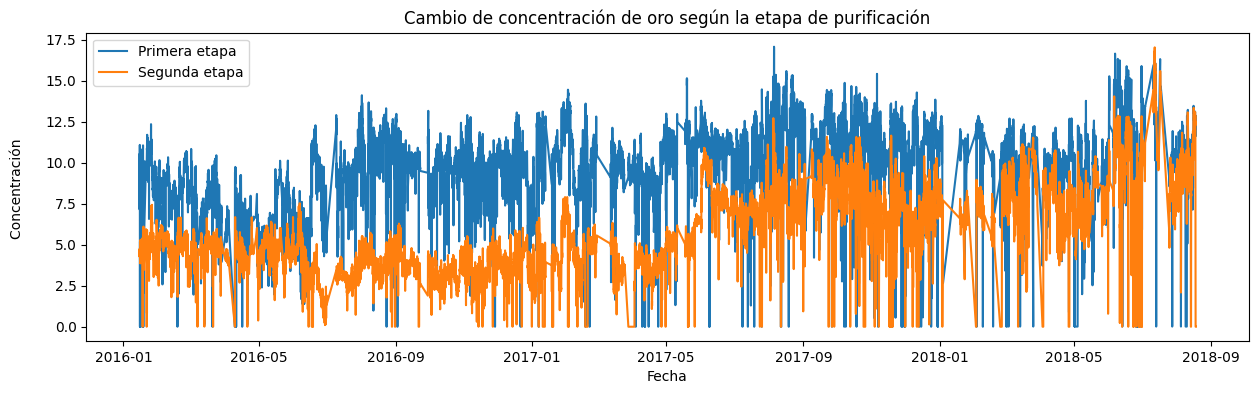

In [22]:
# Comparación de las concentraciones de plomo

concentration(pb)

El proceso de purificación reduce notablemente la concentración de plomo desde la primera a la segunda etapa (9.81 vs 5.65), lo que indica una efectiva eliminación o transformación del plomo durante el proceso. La consistencia en la cantidad de datos y la similitud en la dispersión sugieren que esta tendencia es estable y confiable.

## Comparación de las distribución del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba

Analizaremos y compararemos las distribuciones del tamaño de las partículas de alimentación (`feed size`) en los conjuntos de entrenamiento y prueba, con el objetivo de evaluar la representatividad de los datos y la validez del proceso de evaluación del modelo.

In [23]:
# Columnas relacionadas con 'feed size'

feed_size = data_train.columns[data_train.columns.str.contains(
    'feed_size')].tolist()
print(feed_size)

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']


### Primera etapa del proceso de limpieza

In [24]:
# Información respecto a 'primary_cleaner.input.feed_size'

desc_primary_train = data_train[feed_size[0]].describe()
desc_primary_test = data_test[feed_size[0]].describe()

# Combinación en df
description_primary = pd.DataFrame({
    'Entrenamiento': desc_primary_train,
    'Prueba': desc_primary_test})

display(description_primary.round(2).style.format("{:,.2f}"))

,Entrenamiento,Prueba
count,"13,324.00","5,518.00"
mean,7.35,7.27
std,0.60,0.60
min,1.08,5.65
25%,6.99,6.90
50%,7.30,7.25
75%,7.70,7.60
max,10.47,15.50


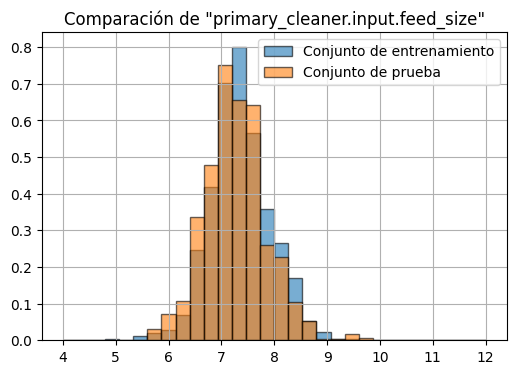

In [25]:
data_train[feed_size[0]].hist(figsize=(
    6, 4), density=True, ec='black', alpha=0.6, bins=30, range=(4, 12), label='Conjunto de entrenamiento')
data_test[feed_size[0]].hist(figsize=(
    6, 4), density=True, ec='black', alpha=0.6, bins=30, range=(4, 12), label='Conjunto de prueba')
plt.title('Comparación de "primary_cleaner.input.feed_size"')
plt.legend()
plt.show()

Las medias (7.35 vs 7.28) y medianas (7.30 vs 7.25) entre ambos conjuntos son muy cercanas, lo que indica que la distribución central de los datos es consistente entre entrenamiento y prueba. Ambas muestras tienen la misma desviación estándar (0.60), lo que sugiere que la dispersión o variabilidad de los datos es similar en ambos conjuntos. 

### Flotación

In [26]:
# 'rougher.input.feed_size'

desc_rougher_train = data_train[feed_size[1]].describe()
desc_rougher_test = data_test[feed_size[1]].describe()

# Combinación en df
description_rougher = pd.DataFrame({
    'Entrenamiento': desc_rougher_train,
    'Prueba': desc_rougher_test})

display(description_rougher.round(2).style.format("{:,.2f}"))

,Entrenamiento,Prueba
count,"13,324.00","5,518.00"
mean,57.80,55.70
std,22.05,21.40
min,9.66,0.05
25%,47.81,43.74
50%,53.88,50.31
75%,62.71,61.90
max,484.97,477.45


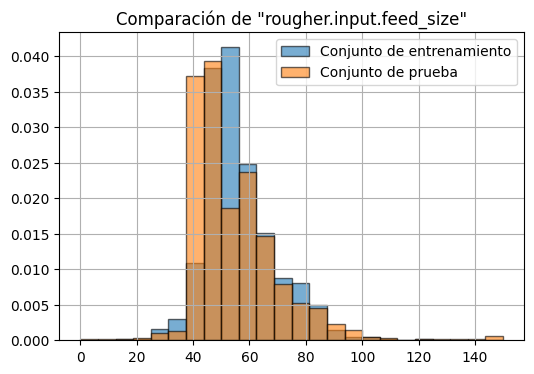

In [27]:
# Visualización de "rougher.input.feed_size"
data_train[feed_size[1]].hist(figsize=(
    6, 4), density=True, ec='black', alpha=0.6, bins=24, range=(0, 150), label='Conjunto de entrenamiento')
data_test[feed_size[1]].hist(figsize=(
    6, 4), density=True, ec='black', alpha=0.6, bins=24, range=(0, 150), label='Conjunto de prueba')
plt.title('Comparación de "rougher.input.feed_size"')
plt.legend()
plt.show()

Las medias (57.80 vs 55.58) y medianas (53.88 vs 50.63) son muy cercanas, lo que indica que **la distribución central de los datos es similar en ambos conjuntos**. La desviación estándar es mayor en el conjunto de entrenamiento (22.05) que en el de prueba (18.18), sugiriendo que el entrenamiento contiene una mayor dispersión de valores. Esto puede deberse a la mayor cantidad de datos o a la presencia de valores más extremos.


En términos generales, **sí es posible realizar una evaluación correcta del modelo** con los conjuntos `primary_cleaner` y `rougher`, ya que ambos conjuntos tienen un tamaño suficiente para garantizar estabilidad estadística, y las distribuciones de los datos de entrenamiento y prueba son comparables y representativas. Esto permite que las métricas de desempeño reflejen con precisión la capacidad del modelo para generalizar a datos no vistos.

## Concentraciones totales de metales en las diferentes etapas

Ahora se observarán las concentraciones de todos los metales en las distintas etapas del proceso (*rougher input*, *rougher output* y *final output*). 

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb
count,"17,501.00","17,501.00","17,501.00","17,501.00","17,501.00","17,501.00","17,501.00","17,501.00","17,501.00"
mean,8.37,8.87,3.59,19.93,12.03,7.58,44.13,5.18,9.99
std,1.90,1.92,1.06,3.66,2.70,1.73,4.82,1.36,1.64
min,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00
25%,6.94,7.31,2.89,18.96,10.63,6.71,43.36,4.27,9.12
50%,8.22,8.70,3.54,20.42,12.14,7.71,44.98,5.07,10.11
75%,9.84,10.31,4.24,21.85,13.77,8.54,46.26,5.89,11.04
max,13.73,14.60,7.14,28.82,24.48,13.09,51.57,16.00,17.03


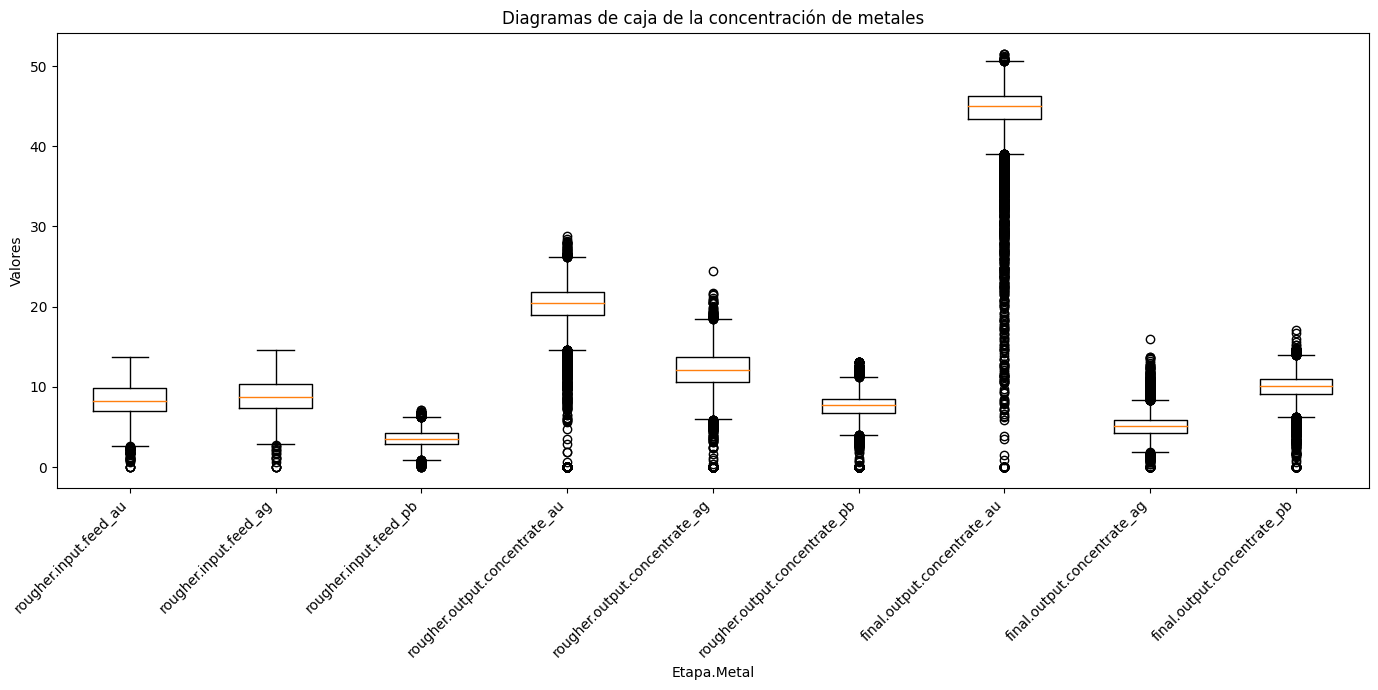

In [28]:
rougher_input_labels = ['rougher.input.feed_au', 
                        'rougher.input.feed_ag', 
                        'rougher.input.feed_pb']
rougher_output_labels = ['rougher.output.concentrate_au', 
                         'rougher.output.concentrate_ag', 
                         'rougher.output.concentrate_pb']
final_output_labels = ['final.output.concentrate_au', 
                       'final.output.concentrate_ag', 
                       'final.output.concentrate_pb']

combined_labels = rougher_input_labels + rougher_output_labels + final_output_labels

# Creación de df con columnas relevantes
concentration = data[combined_labels]
display(concentration.describe().style.format("{:,.2f}"))
print()

# Visualización de diagramas de caja
plt.figure(figsize=(14, 7))
plt.boxplot([concentration[col].dropna() for col in combined_labels], labels=combined_labels)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Etapa.Metal')
plt.ylabel('Valores')
plt.title('Diagramas de caja de la concentración de metales')
plt.tight_layout()
plt.show()

A partir del análisis de los diagramas de caja, se evidencia la presencia significativa de valores atípicos en las variables estudiadas. En consecuencia, se procederá a realizar un análisis detallado mediante la elaboración de una tabla que cuantifique y caracterice los valores atípicos, tanto bajos como altos, para cada metal en las distintas etapas del proceso. 

In [29]:
def outlier_summary(df, columns):
    summary = []
    for col in columns:
        
        # Cálculo de Q1, Q3, IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Umbrales de valores atípicos
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identificación de valores atípicos
        low_outliers = df[df[col] < lower_bound][col]
        high_outliers = df[df[col] > upper_bound][col]
        
        # Resumen
        summary.append({
            'Etapa': col,
            'Valores atípicos bajos': low_outliers.count(),
            'Mínimo bajo': low_outliers.min() if not low_outliers.empty else None,
            'Máximo bajo': low_outliers.max() if not low_outliers.empty else None,
            'Valores atípicos altos': high_outliers.count(),
            'Mínimo alto': high_outliers.min() if not high_outliers.empty else None,
            'Máximo alto': high_outliers.max() if not high_outliers.empty else None
        })
    
    return pd.DataFrame(summary)

outlier_summary(data, combined_labels).round(2)

,Etapa,Valores atípicos bajos,Mínimo bajo,Máximo bajo,Valores atípicos altos,Mínimo alto,Máximo alto
0,rougher.input.feed_au,56,0.01,2.58,0,NaN,NaN
1,rougher.input.feed_ag,18,0.01,2.71,0,NaN,NaN
2,rougher.input.feed_pb,84,0.01,0.84,106,6.28,7.14
3,rougher.output.concentrate_au,695,0.00,14.64,53,26.20,28.82
4,rougher.output.concentrate_ag,428,0.00,5.92,56,18.49,24.48
5,rougher.output.concentrate_pb,457,0.00,3.97,191,11.29,13.09
6,final.output.concentrate_au,1016,0.00,39.01,24,50.61,51.57
7,final.output.concentrate_ag,121,0.00,1.82,415,8.33,16.00
8,final.output.concentrate_pb,341,0.00,6.22,53,13.93,17.03


El análisis de los valores en las columnas indicadas muestra que existen tanto valores atípicos bajos como altos, aunque la cantidad y magnitud varían significativamente según la variable. Por ejemplo, en las variables de entrada como `rougher.input.feed_au` y `rougher.input.feed_ag` predominan outliers bajos, mientras que en `rougher.input.feed_pb` hay tanto valores atípicos bajos como un número considerable de altos (106). En las salidas del proceso (`rougher.output.concentrate` y `final.output.concentrate`) hay una alta cantidad de valores atípicos bajos y también varios valores atípicos altos, especialmente en `final.output.concentrate_ag` con 415 altos, y en `final.output.concentrate_au` con 1016 bajos.

Considerando que algunos valores atípicos pueden corresponder a datos válidos que reflejan la variabilidad intrínseca del proceso o eventos relevantes, no se procederá a eliminar la totalidad de estos. En su lugar, se enfocará la atención únicamente en los valores atípicos extremadamente bajos, específicamente aquellos comprendidos entre 0 y 0.8, que representan el rango máximo de outliers inferiores en la variable `rougher.input.feed_pb`.

In [30]:
print('Número de casos con valor < 0.5 en la etapa "rougher_input": ',
      len(data[data[rougher_input_labels].sum(axis=1) < 0.8]))
print('Número de casos con valor < 0.5 en la etapa "rougher_output": ',
      len(data[data[rougher_output_labels].sum(axis=1) < 0.8]))
print('Número de casos con valor < 0.5 en la etapa "final_output": ',
      len(data[data[final_output_labels].sum(axis=1) < 0.8]))

Número de casos con valor < 0.5 en la etapa "rougher_input":  5
Número de casos con valor < 0.5 en la etapa "rougher_output":  330
Número de casos con valor < 0.5 en la etapa "final_output":  69


In [31]:
# Observación del resto de información en las filas con valores atípicos

# Recopilación de las filas con valores atípicos
outliers_rougher_input = data[rougher_input_labels].sum(axis=1) < 0.8
outliers_rougher_output = data[rougher_output_labels].sum(axis=1) < 0.8
outliers_final_output = data[final_output_labels].sum(axis=1) < 0.8

# Combinación de la información recopilada en un df
combined_outliers = outliers_rougher_input | outliers_rougher_output | outliers_final_output
outliers = data.loc[combined_outliers]

display(outliers.tail())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
18892,2018-03-12 03:59:59,5.413548,9.389648,8.731319,45.270618,100.000000,0.000000,0.000000,0.00000,0.000000,...,22.985096,-498.720702,14.934058,-499.661417,17.998973,-500.156797,12.035195,-500.141814,11.988525,-500.526074
18893,2018-03-12 04:59:59,5.413548,9.389648,8.731319,45.270618,100.000000,0.000000,0.000000,0.00000,0.000000,...,22.953466,-499.747605,14.926294,-500.058041,18.055831,-500.061594,12.014652,-500.253440,12.003849,-499.838564
18894,2018-03-12 05:59:59,5.413548,9.389648,8.731319,45.270618,100.000000,0.000000,0.000000,0.00000,0.000000,...,22.953502,-502.064254,14.918529,-500.135286,17.995171,-500.481962,11.988193,-500.208854,12.004454,-500.074096
18895,2018-03-12 06:59:59,4.238007,7.349108,6.833999,35.424183,100.000000,0.000000,0.000000,0.00000,0.000000,...,22.951054,-498.925902,14.910765,-499.608297,17.954160,-499.576610,12.017173,-500.017529,11.984735,-500.399155
20429,2018-05-15 04:59:59,0.010000,0.010000,0.010000,0.010000,0.168611,8.069722,1.734258,5.26284,2.452356,...,30.028409,-507.406186,22.008754,-501.816732,24.992438,-503.865882,23.019383,-500.472409,25.002424,-503.326766


Al observar el conjunto de datos, se identificó que en las observaciones donde se presentan los valores atípicos señalados, las demás variables asociadas mantienen valores dentro de rangos esperados y consistentes. Esto sugiere que dichos valores atípicos corresponden a anomalías puntuales. En consecuencia, se procederá a la eliminación de estos registros en las tablas de concentración de metales, con el fin de preservar la integridad y calidad del análisis posterior.

In [32]:
# Descripción del df tras eliminar valores menores a 0.8
concentration_clean = concentration.loc[(concentration >= 0.8).all(axis=1)]

concentration_clean.describe().style.format("{:,.2f}")

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb
count,"17,029.00","17,029.00","17,029.00","17,029.00","17,029.00","17,029.00","17,029.00","17,029.00","17,029.00"
mean,8.38,8.88,3.60,20.33,12.26,7.74,44.30,5.21,10.05
std,1.87,1.91,1.04,2.39,2.12,1.36,3.81,1.32,1.49
min,0.83,1.95,0.80,5.62,2.43,1.80,0.90,0.82,1.49
25%,6.94,7.31,2.89,19.09,10.71,6.79,43.37,4.28,9.14
50%,8.23,8.72,3.53,20.47,12.19,7.75,44.97,5.09,10.13
75%,9.85,10.32,4.25,21.88,13.79,8.56,46.24,5.90,11.06
max,13.73,14.60,7.14,28.82,24.48,13.09,51.50,16.00,17.03


Asimismo, los eliminaremos de los conjuntos de entrenamiento y prueba, para evitar que afecten negativamente los resultados posteriores.

In [33]:
# Limpieza del conjunto original, de entrenamiento y de prueba

# Identificación de valores anómalos

reference = data[(data[rougher_input_labels].sum(axis=1) < 0.8) |
                 (data[rougher_output_labels].sum(axis=1) < 0.8) |
                 (data[final_output_labels].sum(axis=1) < 0.8)]['date']

# Limpieza de datos

data_clean = data.drop(data.query('date in @reference').index)
data_train_clean = data_train.drop(data_train.query('date in @reference').index)
data_test_clean = data_test.drop(data_test.query('date in @reference').index)

# Visualización de resultados

result_df = pd.DataFrame(
    {
        'Original': [len(data),len(data_train),len(data_test)],
        'Limpio': [len(data_clean), len(data_train_clean), len(data_test_clean)]
    },
    index=['Original', 'Entrenamiento', 'Prueba']
)
result_df.index.name = 'Conjunto'

display(result_df.style.format("{:,}"))

,Original,Limpio
Conjunto,,
Original,"17,501","17,104"
Entrenamiento,"13,324","13,052"
Prueba,"5,518","5,393"


In [34]:
# Creación de tabla 'summary_metals'

col = ['metal', 
           'rougher.input.feed',         # materia prima
           'rougher.output.concentrate', # concentrado rougher
           'final.output.concentrate']   # concentrado final

summary_metals = pd.DataFrame(columns=col).set_index(keys=['metal'])
summary_metals

# Suma de totales por etapa

au_total = concentration_clean[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'final.output.concentrate_au']].sum().round(2)
ag_total = concentration_clean[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'final.output.concentrate_ag']].sum().round(2)
pb_total = concentration_clean[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'final.output.concentrate_pb']].sum().round(2)

# Incorporación de totales en tabla 'summary_metals'

summary_metals.loc['Oro'] = {'rougher.input.feed': au_total[0],
                              'rougher.output.concentrate': au_total[1], 
                              'final.output.concentrate': au_total[2]}

summary_metals.loc['Plata'] = {'rougher.input.feed': ag_total[0],
                                'rougher.output.concentrate': ag_total[1], 
                                'final.output.concentrate': ag_total[2]}

summary_metals.loc['Plomo'] = {'rougher.input.feed': pb_total[0],
                              'rougher.output.concentrate': pb_total[1], 
                              'final.output.concentrate': pb_total[2]}

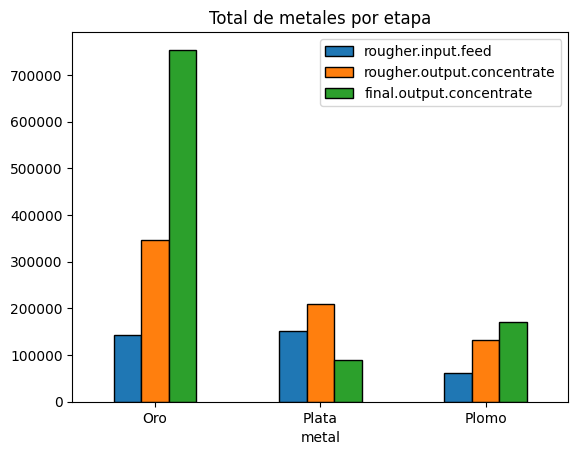

,rougher.input.feed,rougher.output.concentrate,final.output.concentrate
metal,,,
Oro,"142,784.42","346,196.00","754,429.49"
Plata,"151,278.33","208,724.98","88,738.28"
Plomo,"61,387.48","131,790.25","171,101.74"


In [35]:
# Visualización de resultados

summary_metals.plot(kind='bar', rot=0, ec='black')
plt.title('Total de metales por etapa')
plt.show()

display(summary_metals.style.format("{:,.2f}"))

La concentración de **oro** muestra un **incremento sustancial** a lo largo del proceso, pasando de 142,784.42 en la alimentación inicial a 754,426.49 en el concentrado final. Esto indica una eficiente recuperación y enriquecimiento del oro durante las etapas de procesamiento, multiplicando aproximadamente por 5 la concentración inicial.

El **plomo** también **incrementa su concentración de forma significativa**, casi triplicando su cantidad desde la alimentación inicial (61,387.48) hasta el concentrado final (171,101.74). Esto indica que el proceso es efectivo para concentrar plomo, aunque en menor magnitud comparado con el oro.

La **plata** presenta un comportamiento distinto: aunque aumenta en la etapa intermedia (de 151,278.33 a 208,724.98), su **concentración disminuye notablemente** en el concentrado final (88,738.28). Esto podría sugerir pérdidas o separación selectiva de plata en etapas finales, o que parte de la plata se desvía hacia otros productos o residuos.

# Construcción de modelos

## Funciones para el cálculo del *sMAPE* y el *sMAPE final*

Antes de construir y entrenar los modelos, es necesario definir una función que calcule la métrica de evaluación sMAPE. El sMAPE se calcula según la siguiente fórmula:

$\text{sMAPE} = {1 \over n} \displaystyle\sum_{i=1}^{n} {{|y_i - \hat{y_i}|} \over {(|y_i| + |\hat{y_i}|)/2}} \times 100\%$
- $y_i$: Valor del objetivo para la observación con el índice $i$ en el conjunto utilizado para medir la calidad
- $\hat{y_i}$: Valor de la predicción para la observación con el índice $i$
- $n$: Número de observaciones de la muestra

In [36]:
# Función de sMAPE

def smape(actual, predict):
    return 100*(np.abs(actual - predict) / ((np.abs(actual) + np.abs(predict))/2)).mean()

smape_score = met.make_scorer(smape, greater_is_better=False)

Para facilitar el cálculo de la métrica final, definiremos la función `final_smape`:

$\text{sMAPE final} = 25\% \times \text{sMAPE(rougher)} + 75\% \times \text{sMAPE(final)}$

In [37]:
# Función de sMAPE final

def final_smape(rougher, final):
    return (0.25 * rougher) + (0.75 * final)

## Entrenamiento de modelos

### Selección de características y objetivos

A continuación, procederemos a preparar los conjuntos de entrenamiento y prueba, separando en ambos los objetivos `'rougher.output.recovery'` y `'final.output.recovery'`. Para ello, construiremos el conjunto de entrenamiento a partir del df `'data_train_clean'` y el conjunto de prueba a partir de `'data_test_clean'`, ambos conteniendo datos depurados y preparados para el modelado.

In [38]:
# Conjuntos de entrenamiento

features_train = data_train_clean.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_rougher_train = data_train_clean['rougher.output.recovery']
target_final_train = data_train_clean['final.output.recovery']

# Conjuntos de prueba
features_test = data_test_clean.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_rougher_test = data_test_clean['rougher.output.recovery']
target_final_test = data_test_clean['final.output.recovery']

# Conjuntos de entrenamiento resumidos

X = features_train
Y = [target_rougher_train,
     target_final_train]

# Tabla de formas de los conjuntos

data_dict = {
    'Conjuntos de entrenamiento': [features_train.shape, len(target_rougher_train), len(target_final_train)],
    'Conjuntos de prueba': [features_test.shape, len(target_rougher_test), len(target_final_test)]
}

new_dfs = pd.DataFrame(data_dict, index=['Observaciones', 'Objetivo "rougher"', 'Objetivo "final"'])

display(new_dfs)

,Conjuntos de entrenamiento,Conjuntos de prueba
Observaciones,"(13052, 84)","(5393, 84)"
"Objetivo ""rougher""",13052,5393
"Objetivo ""final""",13052,5393


A continuación, se entrenarán y ajustarán los modelos `DecisionTreeRegressor`, `RandomForestRegressor` y `LinearRegression` con el objetivo de optimizar sus parámetros y obtener las mejores puntuaciones posibles, buscando minimizar el error. Estos modelos serán comparados contra un modelo `Dummy`, que servirá como referencia básica para validar la efectividad y sanidad de los resultados obtenidos.

In [39]:
# Creación de tabla para guardar resultados
columns = ['sMAPE_rougher', 'sMAPE_final', 'sMAPE Final']
indexes = ['DecisionTreeRegressor', 'RandomForestRegressor', 'LinearRegression', 'Dummy']

sumario = pd.DataFrame(columns=columns, index=indexes)

In [40]:
# Modelo DecisionTreeRegressor

for y in Y:
    best_score = float('inf')
    print(f'Predicción para "{y.name}"')

    for depth in range(10, 20):
        model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
        scores = cross_val_score(model, X, y, cv=5, scoring=smape_score)
        mean_score = -1 * scores.mean()
    
        if mean_score < best_score:
            best_score = mean_score
            best_model = model.fit(X, y)
    
    # Print the best model and score only once after the loop
    print('Mejor modelo:', best_model)
    print(f'Puntuación: {best_score:.2f}\n')
    
    # Guardado de resultados
    if 'rougher' in y.name:
        sumario.loc['DecisionTreeRegressor', 'sMAPE_rougher'] = round(best_score, 2)
    else:
        sumario.loc['DecisionTreeRegressor', 'sMAPE_final'] = round(best_score, 2)

Predicción para "rougher.output.recovery"
Mejor modelo: DecisionTreeRegressor(max_depth=14, random_state=12345)
Puntuación: 6.75

Predicción para "final.output.recovery"
Mejor modelo: DecisionTreeRegressor(max_depth=17, random_state=12345)
Puntuación: 6.33



In [41]:
# Modelo RandomForestRegressor

for y in Y:
    best_score = float('inf')
    print(f'Predicción para "{y.name}"')

    for depth in range(10, 20):

        model = RandomForestRegressor(random_state=12345, n_estimators=15, max_depth=depth)
        scores = cross_val_score(model, X, y, cv=5, scoring=smape_score)
        mean_score = -1 * scores.mean()
    
        if mean_score < best_score:
            best_score = mean_score
            best_model = model.fit(X, y)
        
    print('Mejor modelo:', best_model)
    print(f'Puntuación: {best_score:.2f}\n')
     
        # Guardado de resultados
    if 'rougher' in y.name:
        sumario.loc['RandomForestRegressor', 'sMAPE_rougher'] = round(best_score, 2)
    else:
        sumario.loc['RandomForestRegressor', 'sMAPE_final'] = round(best_score, 2)

Predicción para "rougher.output.recovery"
Mejor modelo: RandomForestRegressor(max_depth=17, n_estimators=15, random_state=12345)
Puntuación: 4.42

Predicción para "final.output.recovery"
Mejor modelo: RandomForestRegressor(max_depth=16, n_estimators=15, random_state=12345)
Puntuación: 4.46



In [42]:
# Modelo "LinearRegression"

for y in Y:
    
    print(f'Predicción para "{y.name}"')
    model = LinearRegression()
    scores = cross_val_score(model, X, y, cv=5, scoring=smape_score)
    mean_score = -1 * scores.mean()
    print(f'Puntuación: {mean_score:.2f}\n')

    model.fit(X, y)

    # Guardado de resultados
    if 'rougher' in y.name:
        sumario.loc['LinearRegression', 'sMAPE_rougher'] = round(mean_score, 2)
    else:
        sumario.loc['LinearRegression', 'sMAPE_final'] = round(mean_score, 2)

Predicción para "rougher.output.recovery"
Puntuación: 5.63

Predicción para "final.output.recovery"
Puntuación: 8.06



In [43]:
# Prueba de sanidad "Dummy"

for y in Y:
    
    print(f'Predicción para "{y.name}"')
    model = DummyRegressor(strategy='mean')
    scores = cross_val_score(model, X, y, cv=3, scoring=smape_score)
    mean_score = -1 * scores.mean()

    print(f'Puntuación: {mean_score:.2f}\n')

    model.fit(X, y)

    # Guardado de resultados
    if 'rougher' in y.name:
        sumario.loc['Dummy', 'sMAPE_rougher'] = round(mean_score, 2)
    else:
        sumario.loc['Dummy', 'sMAPE_final'] = round(mean_score, 2)

Predicción para "rougher.output.recovery"
Puntuación: 10.07

Predicción para "final.output.recovery"
Puntuación: 11.96



In [44]:
# Calculo de sMAPE Final
sumario['sMAPE Final'] = final_smape(sumario['sMAPE_rougher'], sumario['sMAPE_final'])
display(sumario)

,sMAPE_rougher,sMAPE_final,sMAPE Final
DecisionTreeRegressor,6.75,6.33,6.435
RandomForestRegressor,4.42,4.46,4.45
LinearRegression,5.63,8.06,7.4525
Dummy,10.07,11.96,11.4875


La tabla muestra el desempeño comparativo de diferentes modelos de predicción evaluados mediante la métrica sMAPE en dos objetivos clave: `'rougher'` y `'final'`. El modelo `RandomForestRegressor` destaca por ofrecer los mejores resultados, con errores sMAPE significativamente menores (alrededor de 4.45%), lo que indica una mayor precisión y capacidad para capturar la complejidad de los datos. En contraste, el `DecisionTreeRegressor` y la `LinearRegression` presentan errores más altos, especialmente esta última en el objetivo final, lo que sugiere limitaciones para modelar las relaciones subyacentes. Finalmente, el modelo `Dummy`, que sirve como referencia básica, arroja los peores resultados, confirmando que los modelos entrenados aportan un valor predictivo real.

## Prueba del modelo elegido

A partir de los hallazgos anteriores, se ha seleccionado el modelo `RandomForestRegressor` para ser aplicado sobre los conjuntos de prueba. El modelo se ajustará de manera individual conforme a los parámetros óptimos obtenidos previamente, con el fin de maximizar su rendimiento y asegurar una mejor capacidad de generalización al evaluarse con datos no vistos durante el entrenamiento.

In [45]:
# Mejores modelos
model_rougher = RandomForestRegressor(max_depth=17, n_estimators=15, random_state=12345)
model_rougher.fit(X, target_rougher_train)

model_final = RandomForestRegressor(max_depth=16, n_estimators=15, random_state=12345)
model_final.fit(X, target_final_train)

# Predicción de los objetivos de prueba

prediction_rougher = model_rougher.predict(features_test)
prediction_final = model_final.predict(features_test)

# sMAPE para 'rougher' y 'final'
rougher = smape(target_rougher_test, prediction_rougher)
final = smape(target_final_test, prediction_final)

# Cálculo de sMAPE Final
final_smape_test = final_smape(rougher, final)

# Tabla de resultados
resultados = pd.DataFrame({
    'Tipo': ["smape 'rougher'", "smape 'final'", "smape FINAL"],
    'Puntuación': [rougher.round(2), final.round(2), final_smape_test.round(2)]})

display(resultados)

,Tipo,Puntuación
0,smape 'rougher',2.49
1,smape 'final',3.62
2,smape FINAL,3.34


El modelo `RandomForestRegressor` ha demostrado un desempeño sólido en la etapa de prueba, alcanzando un sMAPE final de aproximadamente 3.34%. Este bajo nivel de error relativo indica que las predicciones del modelo se ajustan con alta precisión a los valores reales, reflejando su capacidad para capturar las relaciones complejas presentes en los datos. Considerando la robustez inherente de Random Forest frente al ruido y su habilidad para modelar no linealidades, este resultado es alentador y sugiere que el modelo es adecuado para su aplicación en producción.

# Conclusiones

- Se desarrolló un prototipo de modelo de Machine Learning para Zyfra con el objetivo de predecir la cantidad de oro extraído, utilizando datos de extracción y purificación para optimizar la producción y eliminar parámetros no rentables.

- El análisis inicial confirmó que los datos son mayoritariamente numéricos. La columna `'date'` se convirtió a formato `datetime` para facilitar su manejo; además, se identificaron valores faltantes que fueron recuperados posteriormente.

- La función desarrollada para calcular la recuperación del concentrado rougher mostró una precisión excelente, validando la calidad de los datos y la metodología empleada.

- El análisis de concentraciones de metales evidenció que el proceso de purificación concentra eficazmente el oro y el plomo, mientras que la plata presenta un comportamiento distinto, sugiriendo posibles pérdidas o desviaciones en etapas finales.

- La comparación entre los conjuntos de entrenamiento y prueba mostró distribuciones similares y tamaños adecuados, garantizando la representatividad y validez de la evaluación del modelo.

- Se identificaron y eliminaron valores atípicos en las concentraciones de metales para evitar sesgos negativos en el modelado.

- Tres modelos predictivos (`DecisionTreeRegressor`, `RandomForestRegressor` y `LinearRegression`) fueron entrenados y evaluados, destacando `RandomForestRegressor` por su mejor desempeño con un sMAPE cercano a 4.45%, superando ampliamente al modelo `Dummy`.

- El modelo `RandomForestRegressor` fue seleccionado para la prueba final, donde demostró un rendimiento sólido con un sMAPE final de aproximadamente 3.34%, confirmando su capacidad para generalizar y su idoneidad para aplicación en producción.
